# Discovery and Learning with Big Data/Machine Learning
## Sri Charan Bodduna
### EDA: Python Data Visualization with Matplotlib, Pandas, and NumPy
### Import Libraries and Load Dataset

In [74]:
# Import all needed libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from pandas import DataFrame, read_csv

%matplotlib inline

### Reading data set from file system

In [75]:
# Loading the data set into a pandas dataframe
# Reading Iris data set from local storage and create the dataframe data



filepath1 = '/Users/sricharanbodduna/Downloads/Iris (3).csv' 
data = pd.read_csv (filepath1)
data.head(5)



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Univariate Data Visualization
## Histograms
#### Histograms are great when we would like to show the distribution of the data we are working with.


In [76]:
#print information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


<function matplotlib.pyplot.show(close=None, block=None)>

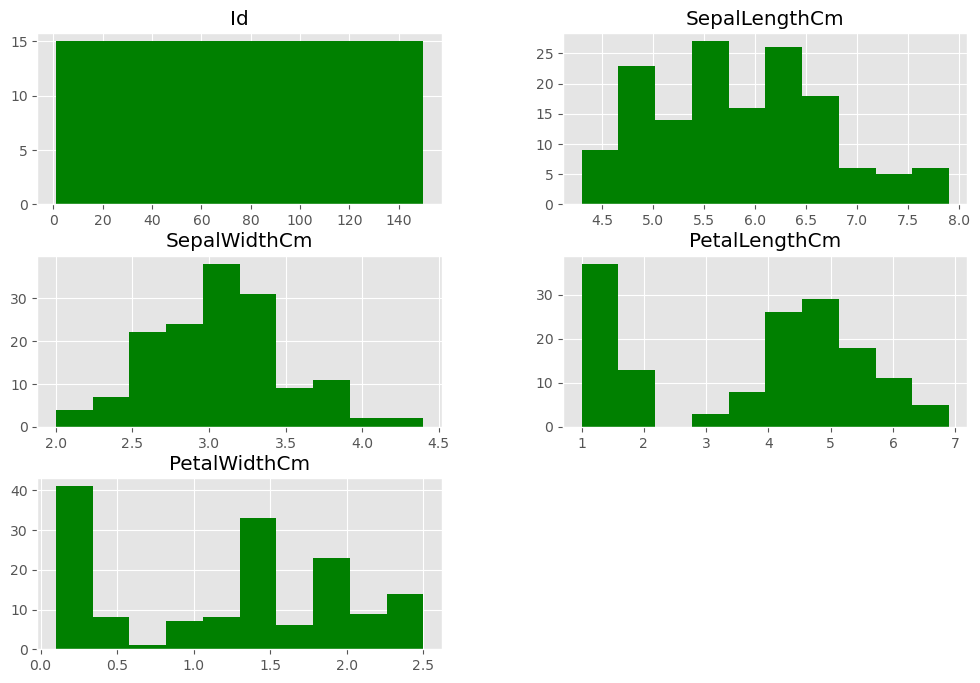

In [77]:
# we are using hist function to plot data from of 
# SepalLengthCm, SepalWidthCm, PetalWidthCm and PetalLengthCm

df.hist(figsize=(12,8), color='green')
plt.show

In [78]:
# we wanted to see distinct values present in the dataset for each species type

print(data.groupby('Species').size())


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

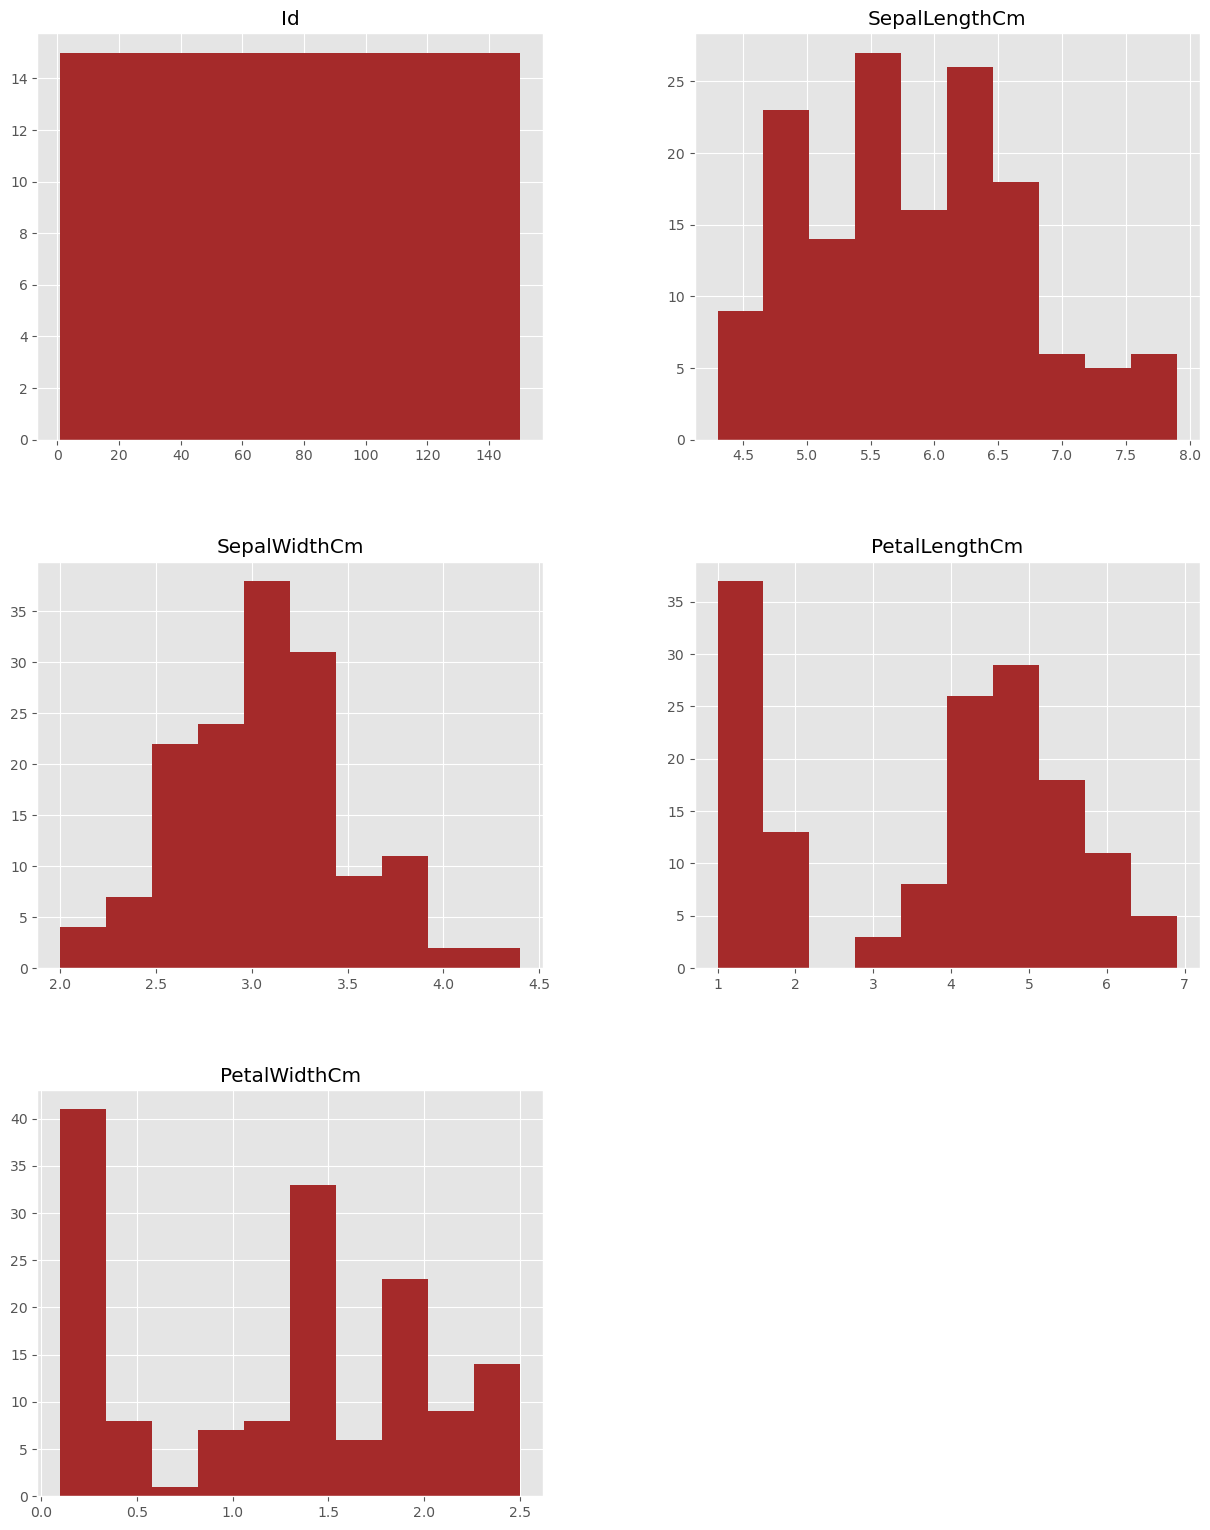

In [79]:
# histograms are used to understand the data distribution

data.hist(figsize=(15,19), color='brown')
plt.show

In [80]:
# we dont require id column in the dataset for analysis hence we delete it.

data.__delitem__('Id')

<function matplotlib.pyplot.show(close=None, block=None)>

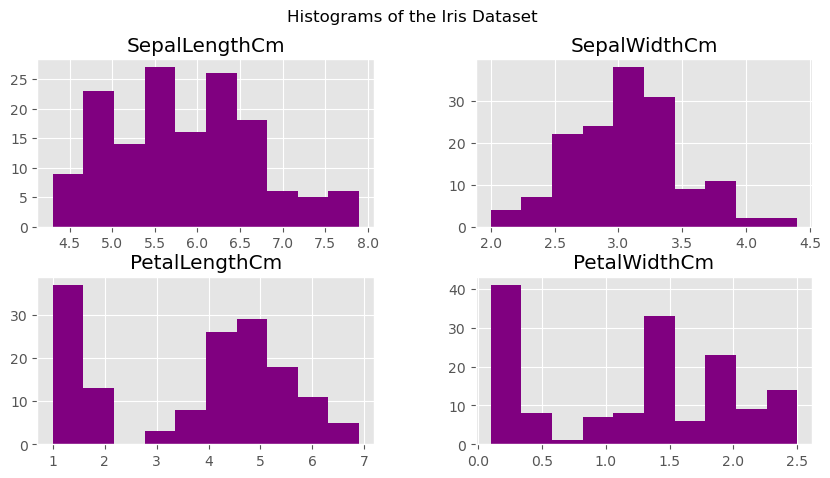

In [81]:
data.hist(figsize=(10,5), color ="purple")
plt.suptitle("Histograms of the Iris Dataset")
plt.show

# we removed the id column and plotting the columns

### Let's say we want to make changes to the histograms.
### We will look at only the PetalLengthCm variable.

Text(0, 0.5, 'Count')

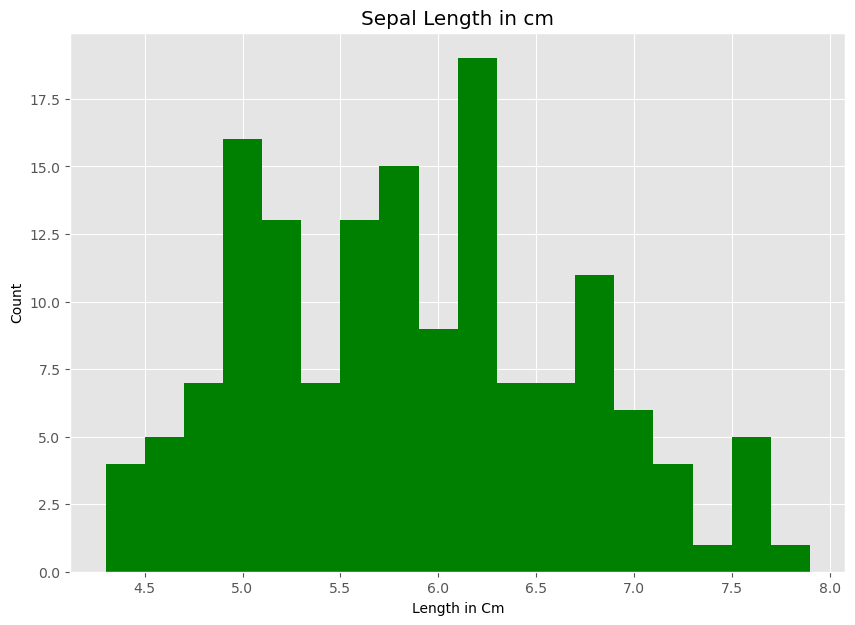

In [82]:
# now, we are just plotting one column - Sepal Length.  We need to isolate the one variable using square brackets [].



plt.figure(figsize = (10, 7))
x = data["SepalLengthCm"]
#  bins is an integer, it defines the number of equal-width bins in the range
plt.hist(x, bins = 18, color = "green")
plt.title("Sepal Length in cm")
plt.xlabel("Length in Cm")
plt.ylabel("Count")

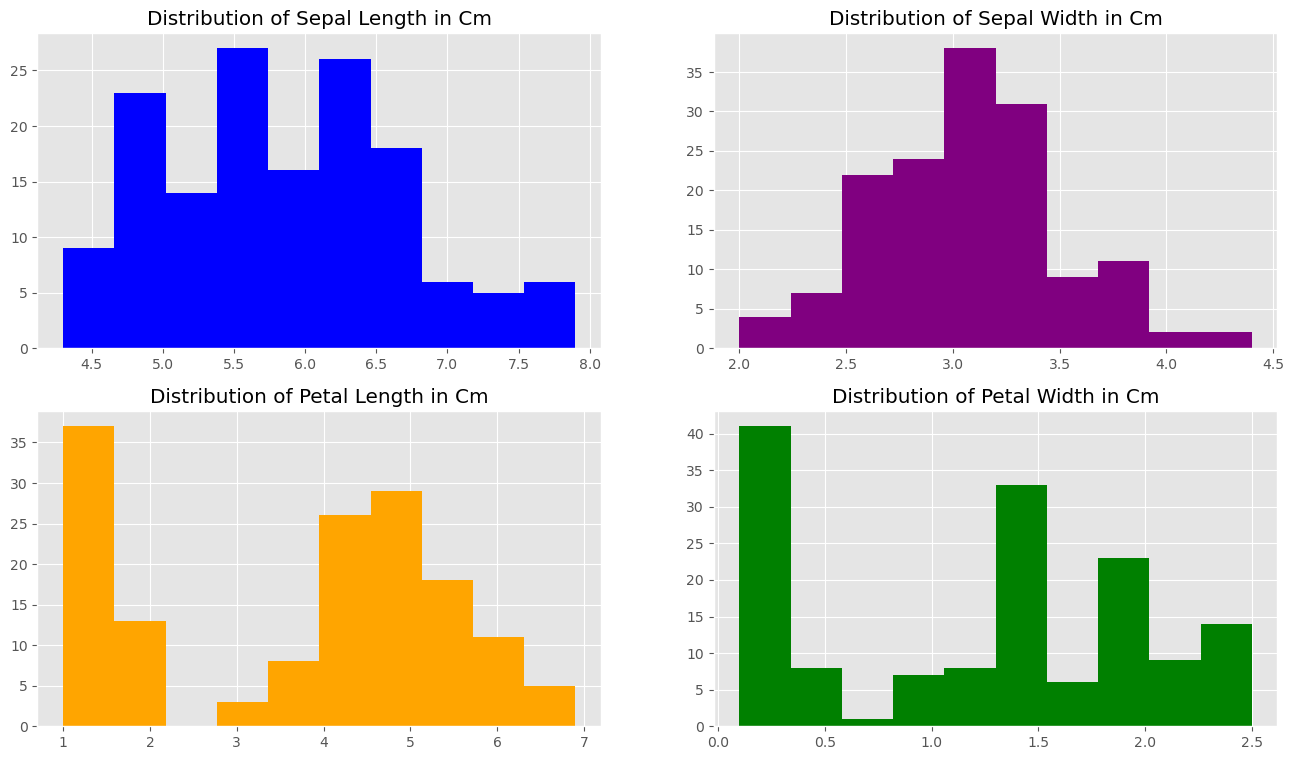

In [83]:
# In the below code we are separating the different plot by setting the titles for the histogram plots
# grammar of graphics plot

plt.style.use("ggplot")

fig, axes = plt.subplots(2, 2, figsize=(16,9))

axes[0,0].set_title("Distribution of Sepal Length in Cm")
axes[0,0].hist(df['SepalLengthCm'], bins=10, color ='blue');
axes[0,1].set_title("Distribution of Sepal Width in Cm")
axes[0,1].hist(df['SepalWidthCm'], bins=10, color ='purple');
axes[1,0].set_title("Distribution of Petal Length in Cm")
axes[1,0].hist(df['PetalLengthCm'], bins=10, color = 'orange');
axes[1,1].set_title("Distribution of Petal Width in Cm")
axes[1,1].hist(df['PetalWidthCm'], bins=10, color ='green');

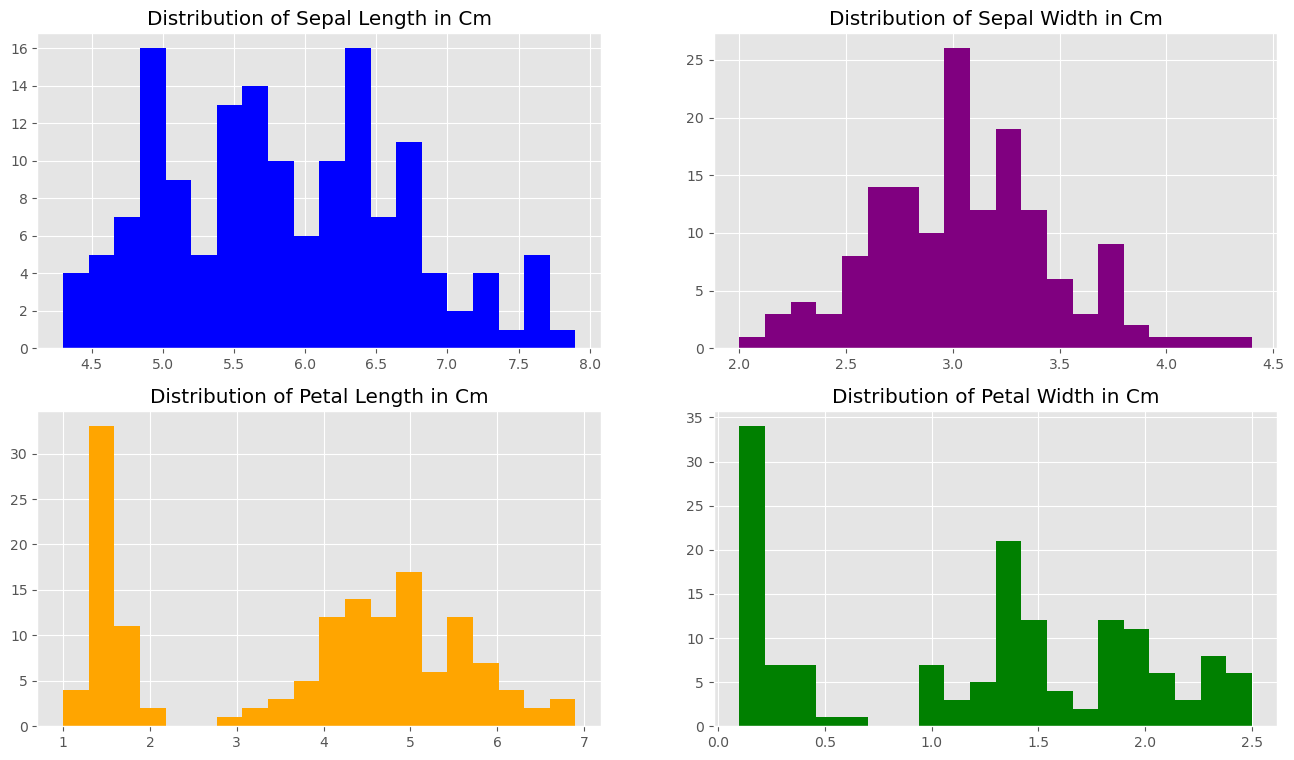

In [84]:
# In the previous plot we are changing the size of bin to 20

plt.style.use("ggplot")

fig, axes = plt.subplots(2, 2, figsize=(16,9))

axes[0,0].set_title("Distribution of Sepal Length in Cm")
axes[0,0].hist(df['SepalLengthCm'], bins=20, color ='blue');
axes[0,1].set_title("Distribution of Sepal Width in Cm")
axes[0,1].hist(df['SepalWidthCm'], bins=20, color ='purple');
axes[1,0].set_title("Distribution of Petal Length in Cm")
axes[1,0].hist(df['PetalLengthCm'], bins=20, color = 'orange');
axes[1,1].set_title("Distribution of Petal Width in Cm")
axes[1,1].hist(df['PetalWidthCm'], bins=20, color ='green');

## Density Plots -
#### A Density Plot visualizes the distribution of data over a time period or a continuous interval. This chart is a variation of a Histogram but it smooths out the noise made by binning.

#### Density Plots have a slight advantage over Histograms since they're better at determining the distribution shape and, as mentioned above, they are not affected by the number of bins used (each bar used in a typical histogram). As we saw above a Histogram with only 10 bins wouldn't produce a distinguishable enough shape of distribution as a 20-bin Histogram would. With Density Plots, this isn't an issue.

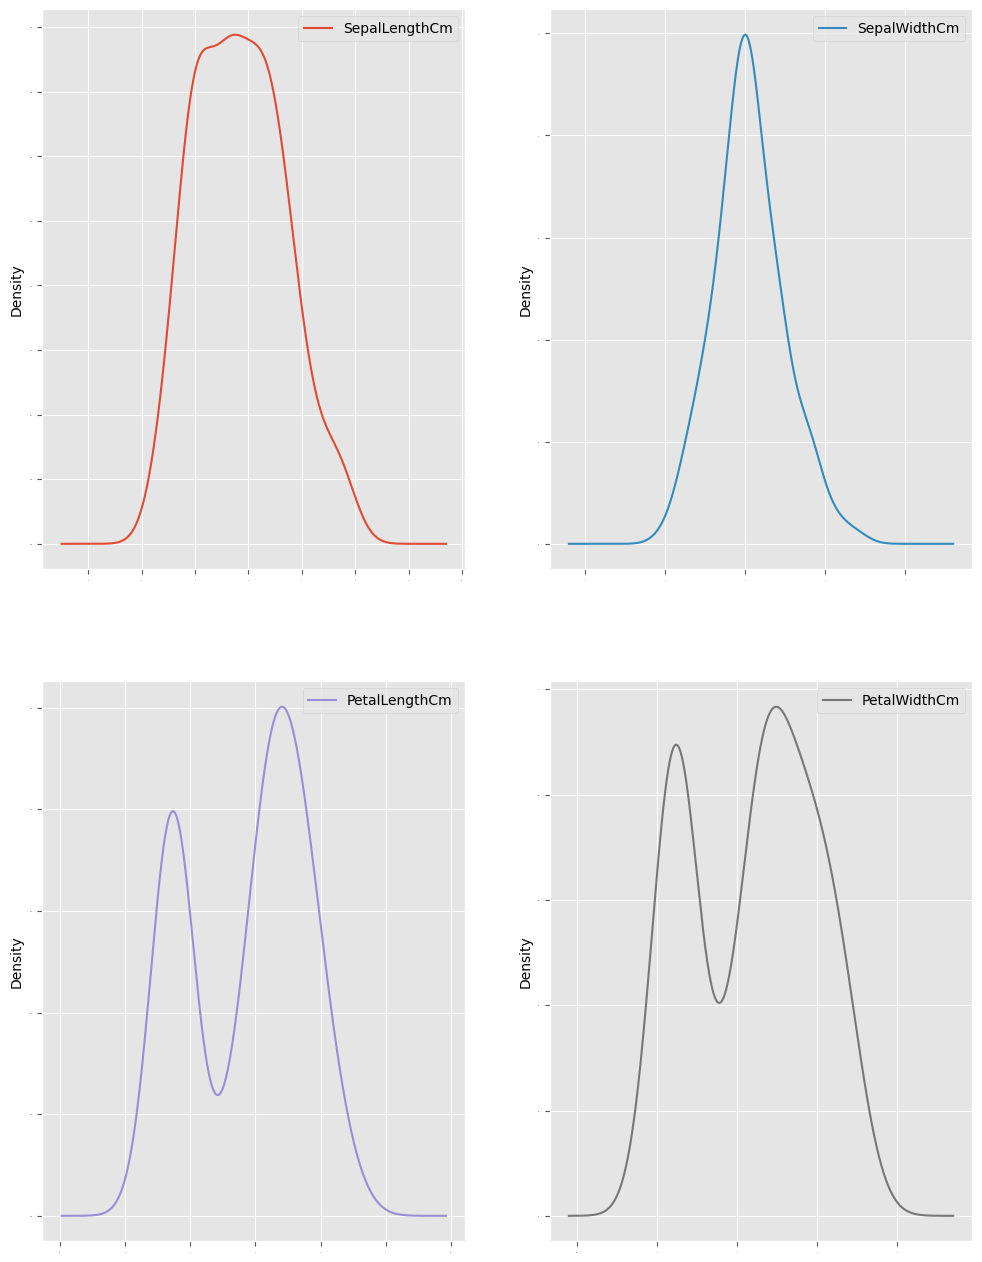

In [85]:
# Here we are creating the density plot by setting the kind=density
# If subplots=True is specified, plots for each column are drawn as subplots

data.plot(kind='density', subplots=True, layout=(2,2), sharex=False, legend=True, fontsize=1, figsize=(12,16))
plt.show()

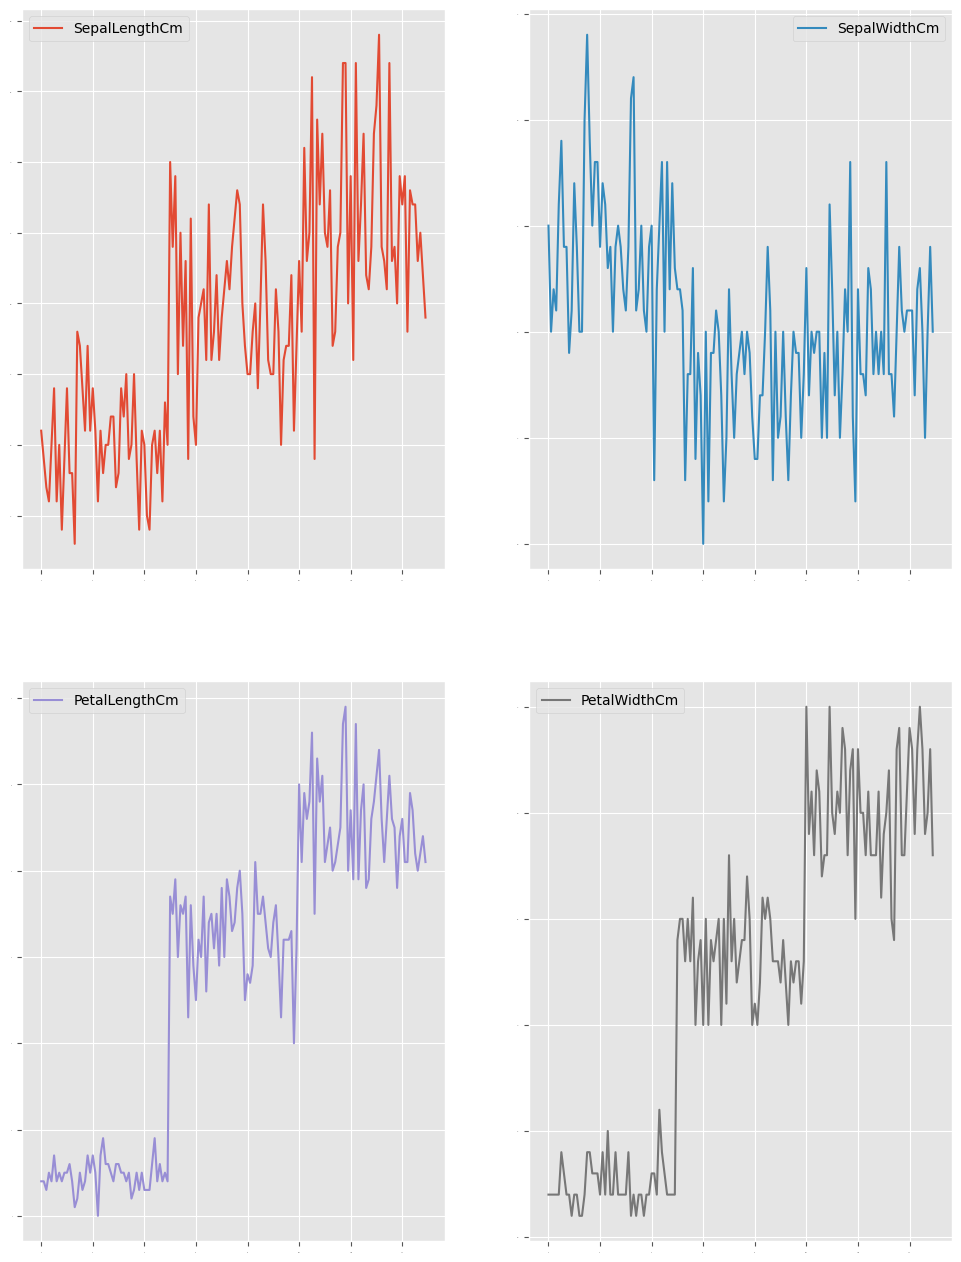

In [86]:
# create a line graph

data. plot(kind='line', subplots=True, layout=(2,2), sharex=False, legend=True, fontsize=1, figsize=(12,16))
plt.show()

## Boxplots
#### A box plot is a very good plot to understand the spread, median, and outliers of data

#### Q3: This is the 75th percentile value of the data. It's also called the upper hinge.

#### Q1: This is the 25th percentile value of the data. It's also called the lower hinge.

#### Box: This is also called a step. It's the difference between the upper hinge and the lower hinge.

#### Median: This is the midpoint of the data.

#### Max: This is the upper inner fence. It is 1.5 times the step above Q3.

#### Min: This is the lower inner fence. It is 1.5 times the step below Q1.

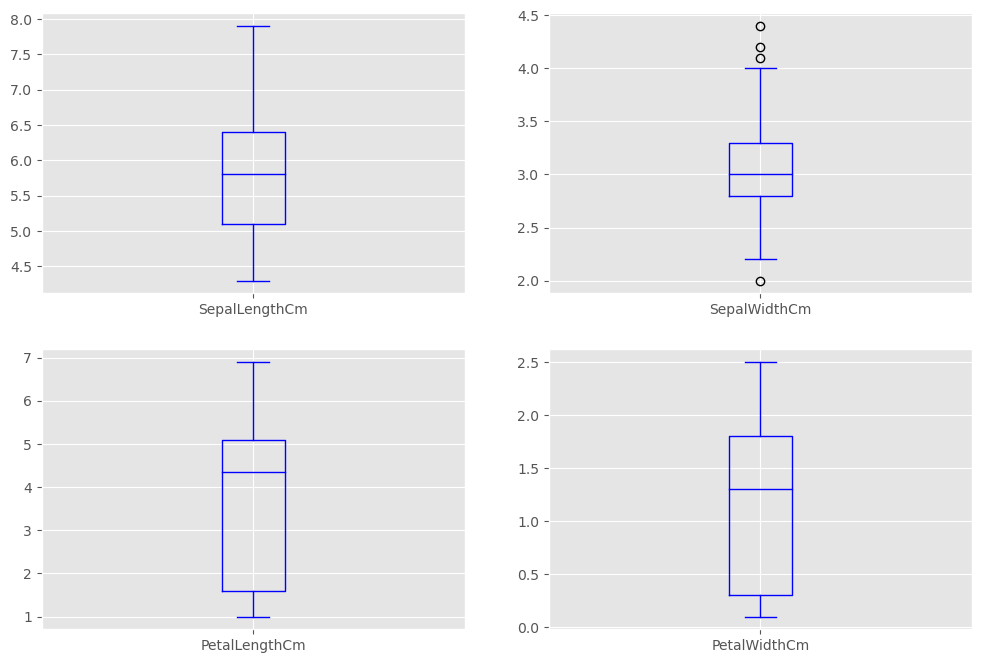

In [87]:
# create a box plot

data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, color = 'blue', figsize=(12,8))
plt.show()

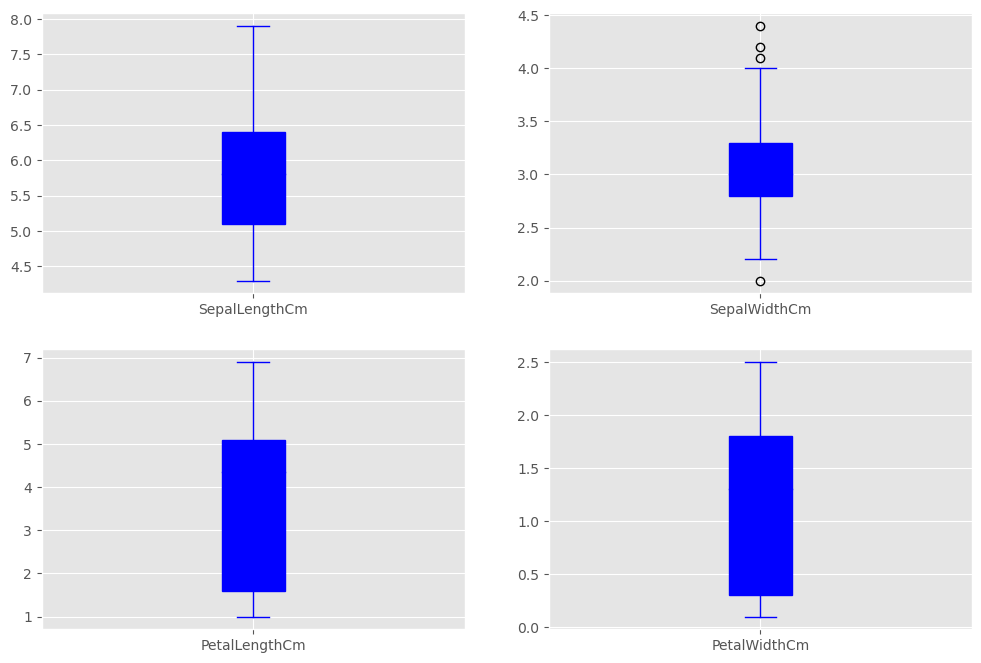

In [88]:
# fill the boxes with color, using patch_artist

data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, color = 'blue', figsize=(12,8), patch_artist=True )
plt.show()

## Multivariate Data Visualization
### Scatter Matrix Plot
#### A scatter plot matrix is a grid (or matrix) of scatter plots. This type of graph is used to visualize bivariate relationships between different combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart. For example, the first row shows the relationship between SepalLength and the other 3 variables.

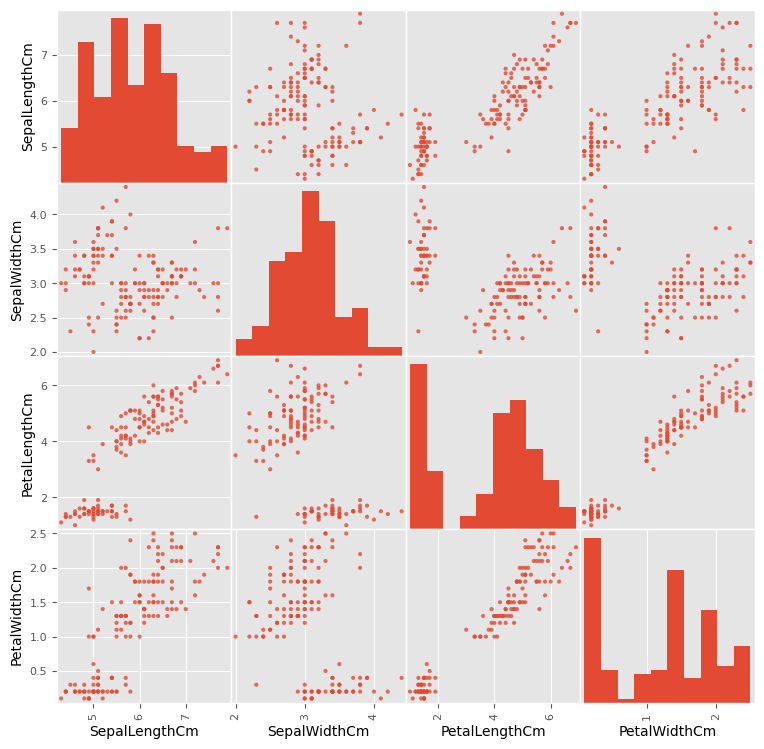

In [89]:
# create a scatter matrix plot
# alpha = Amount of transparency applied

scatter_matrix (data, alpha=0.8, figsize=(9,9))
plt.show()

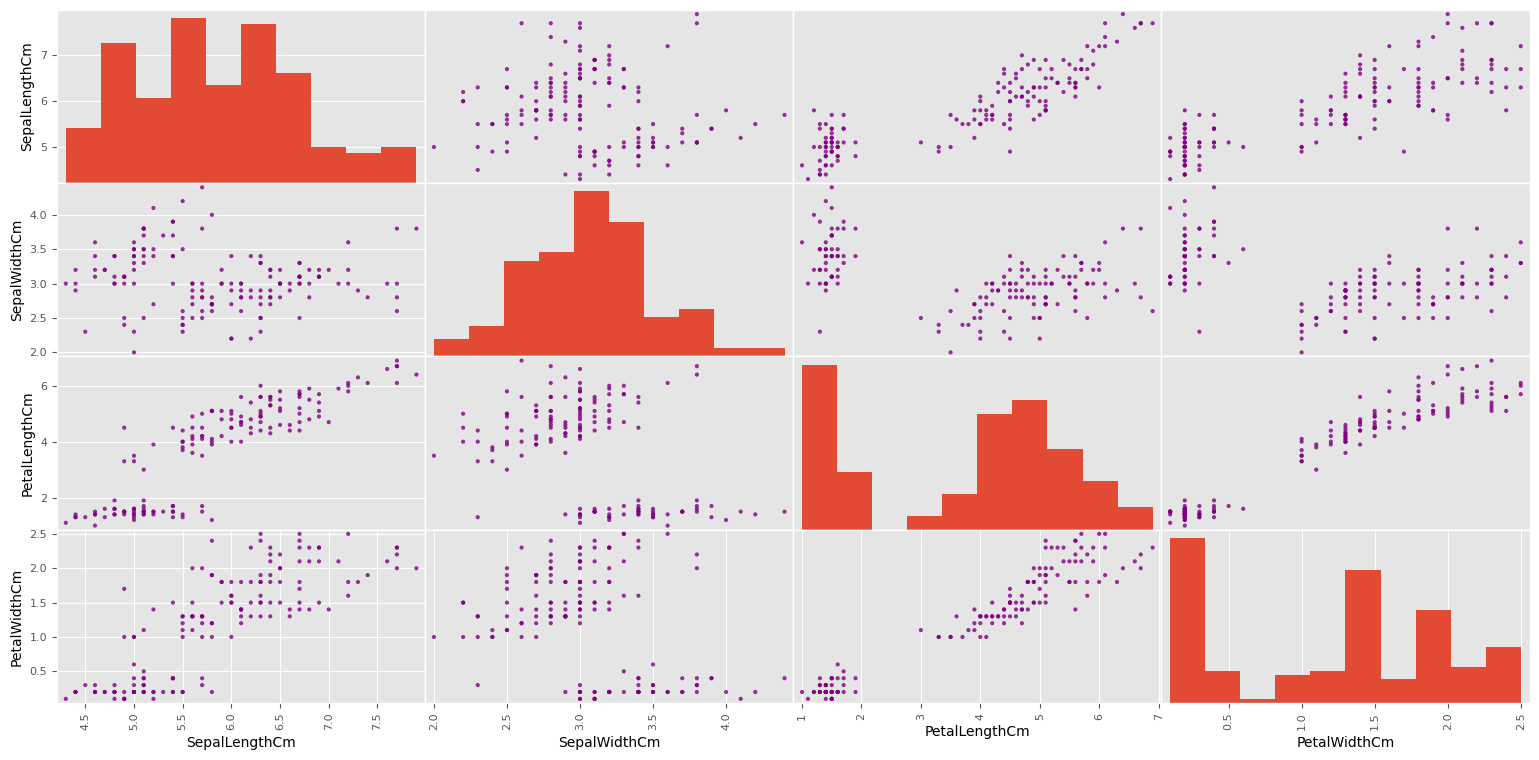

In [90]:
# change the color to purple.  Notice only one part of the plot changes.

scatter_matrix (data, alpha=0.8, figsize=(19,9), color = 'purple')
plt.show()

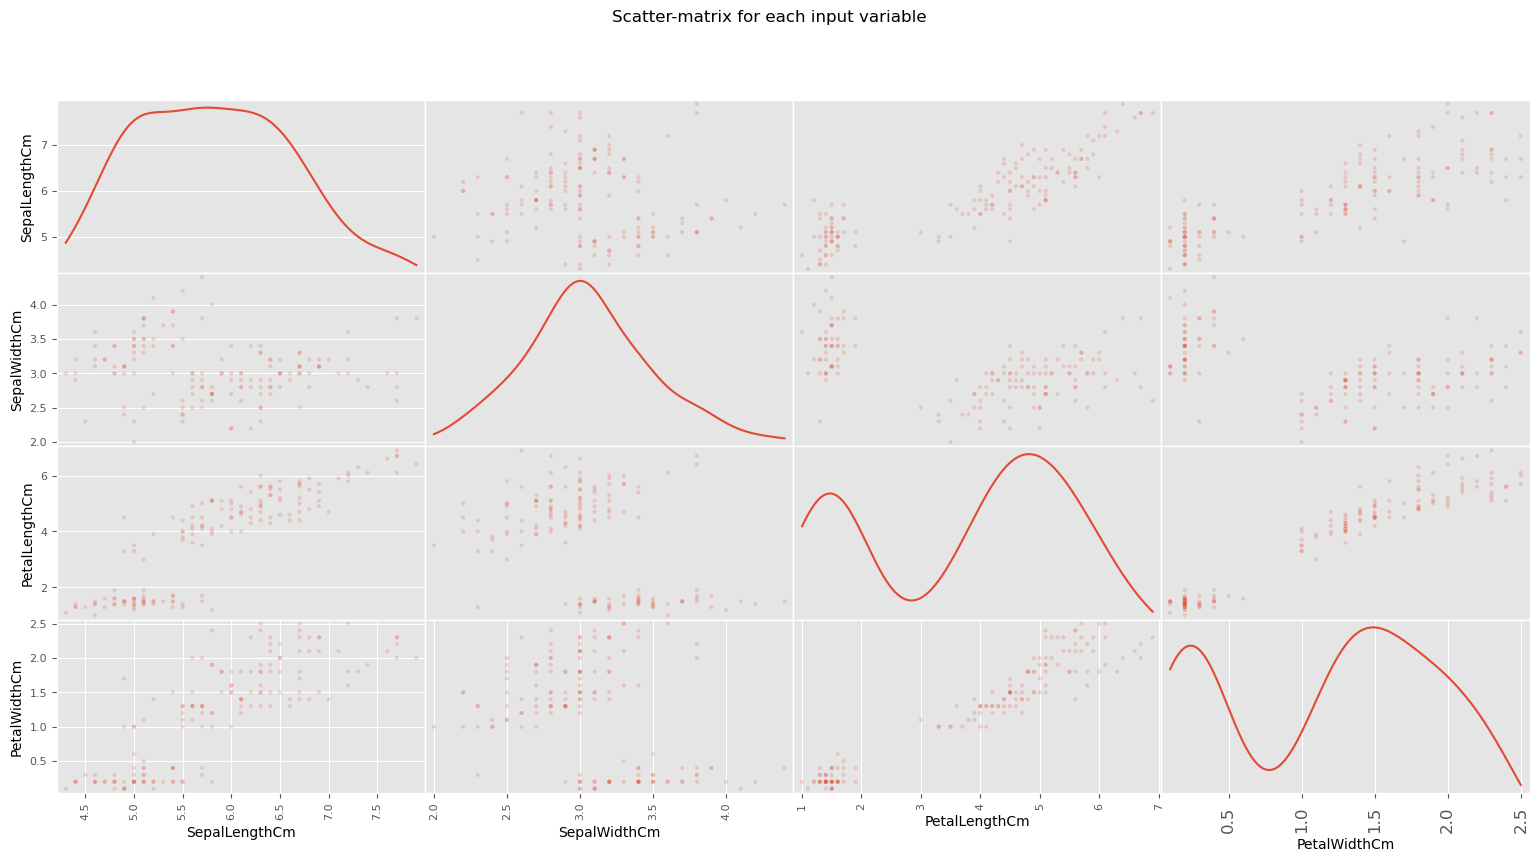

In [91]:
# we are adding a subtitle.
# Pick between ‘kde’ and ‘hist’ for either Kernel Density Estimation or Histogram plot in the diagonal
# KDE = a density estimator is an algorithm which seeks to model the probability distribution that generated a dataset

scatter_matrix(data,alpha=0.2, diagonal = 'kde', figsize=(19,9))
plt.suptitle('Scatter-matrix for each input variable')
plt.tick_params(labelsize=12, pad=6)

Text(0.5, 0.98, 'Scatter-matrix for each input variable')

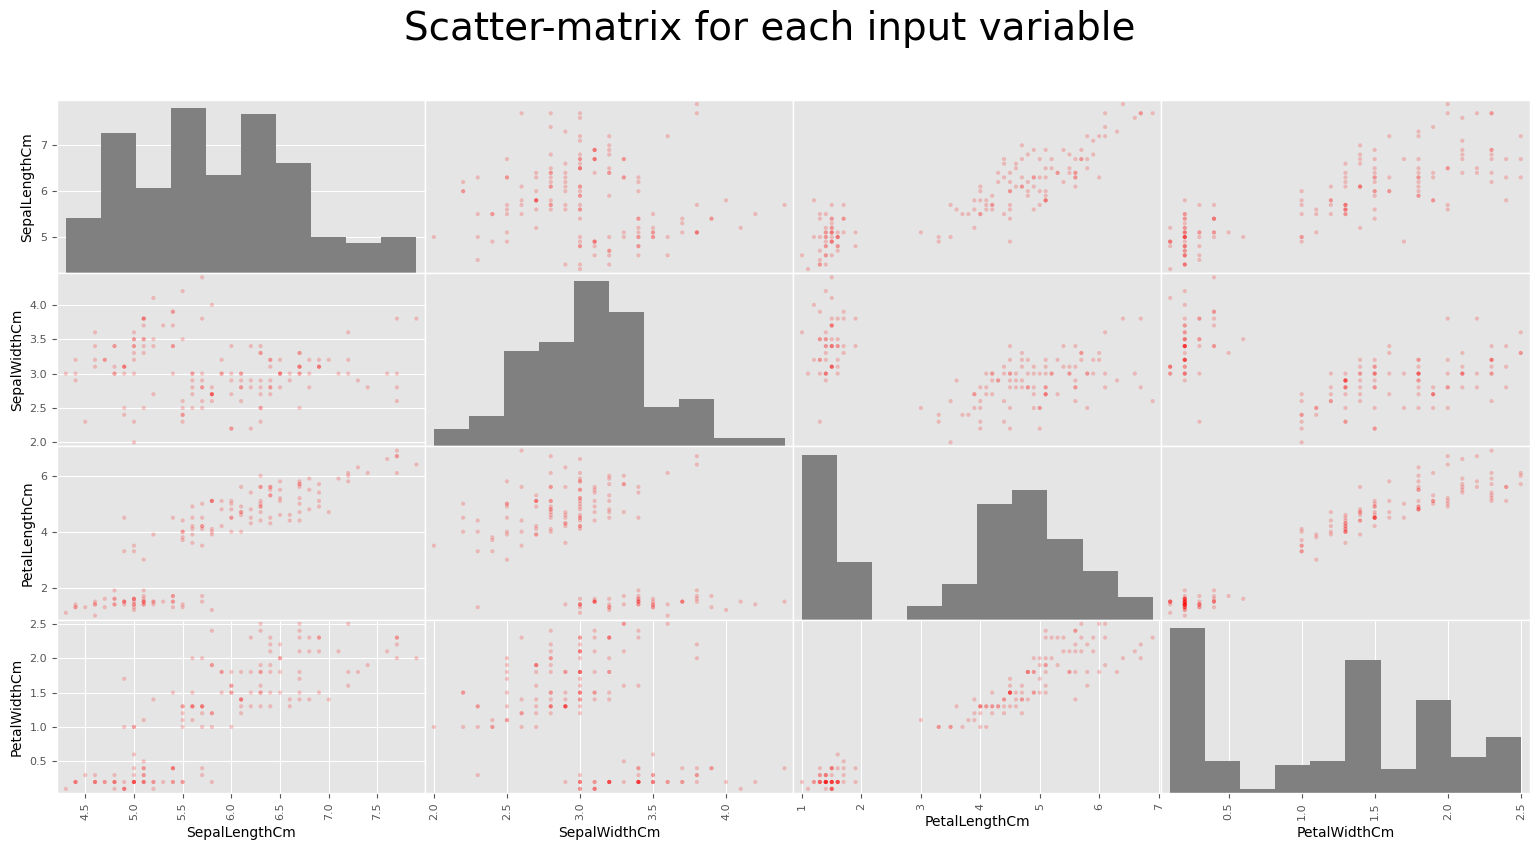

In [92]:
# Finally, we are modifying the color to both parts of the plot.

scatter_matrix(data, figsize= (19,9), alpha=0.2, c='red', hist_kwds={'color':['grey']})
plt.suptitle('Scatter-matrix for each input variable', fontsize=28)